In [1]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

from keras import layers
from keras import models

from keras import callbacks
tensorboard = callbacks.TensorBoard(log_dir='/tmp/tensorboard/mnist', histogram_freq=0, write_graph=True, write_images=True)

/home/zafar/.pyenv/versions/2.7.13/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
X_train = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.
X_test = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [4]:
def model_arch():
    m = models.Sequential()
    m.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
    m.add(layers.MaxPooling2D((2, 2)))
    m.add(layers.Conv2D(64, (3, 3), activation='relu'))
#     m.add(layers.MaxPooling2D((2, 2)))
#     m.add(layers.Conv2D(64, (3, 3), activation='relu'))
    m.add(layers.Flatten())
    m.add(layers.Dense(512, activation='relu'))
    m.add(layers.Dense(10, activation='softmax'))
    
    # m.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
    m.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return m

model = model_arch()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4719104   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 4,743,050
Trainable params: 4,743,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_split=0.2, shuffle=True, callbacks=[tensorboard])
test_loss, test_acc = model.evaluate(X_test, y_test)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 70us/step - loss: 0.3249 - acc: 0.9009 - val_loss: 0.1288 - val_acc: 0.9617
Epoch 2/20
48000/48000 [==============================] - 3s 56us/step - loss: 0.0697 - acc: 0.9787 - val_loss: 0.0512 - val_acc: 0.9845
Epoch 3/20
48000/48000 [==============================] - 3s 60us/step - loss: 0.0410 - acc: 0.9872 - val_loss: 0.0569 - val_acc: 0.9839
Epoch 4/20
48000/48000 [==============================] - 3s 58us/step - loss: 0.0261 - acc: 0.9917 - val_loss: 0.0359 - val_acc: 0.9898
Epoch 5/20
48000/48000 [==============================] - 3s 57us/step - loss: 0.0181 - acc: 0.9941 - val_loss: 0.0373 - val_acc: 0.9886
Epoch 6/20
48000/48000 [==============================] - 3s 59us/step - loss: 0.0125 - acc: 0.9965 - val_loss: 0.0471 - val_acc: 0.9867
Epoch 7/20
48000/48000 [==============================] - 3s 58us/step - loss: 0.0082 - acc: 0.9972 - val_loss: 0.0408 - val_acc

In [6]:
print (test_acc)

0.9899


<IPython.core.display.Javascript object>


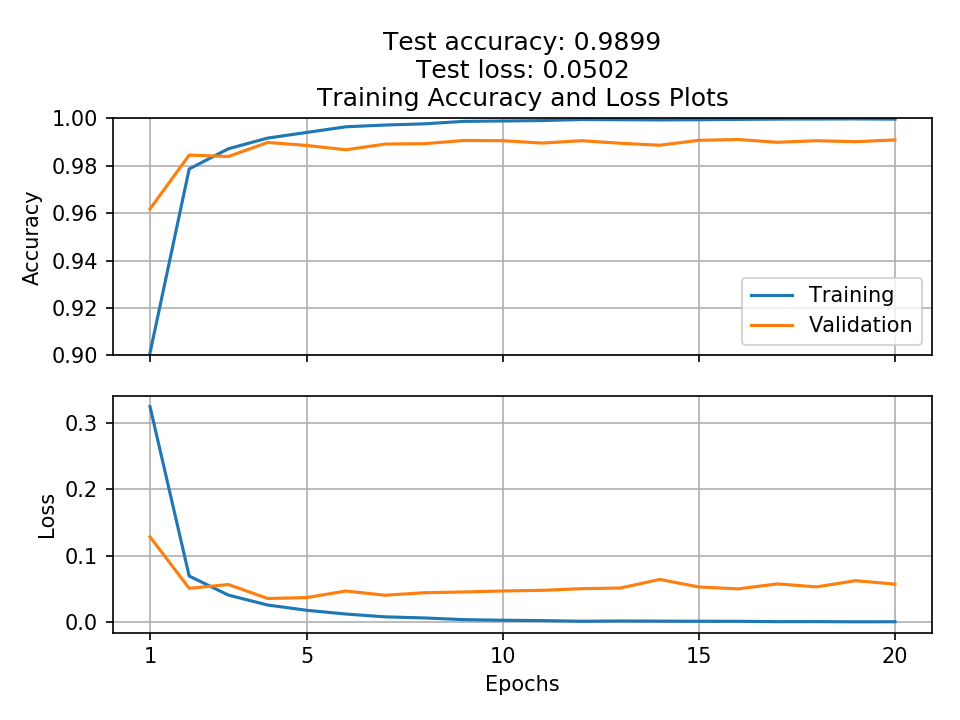

In [14]:
epochs = np.arange(1, 21)
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(epochs, acc, label="Training")
ax[0].plot(epochs, val_acc, label="Validation")
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim([0.9, 1])
ax[0].grid()
ax[0].legend()

ax[1].plot(epochs, loss, label="Training")
ax[1].plot(epochs, val_loss, label="Validation")
ax[1].set_ylabel('Loss')
ax[1].set_xticks([1, 5, 10, 15, 20])
# ax[1].set_ylim([0, 0.02])
ax[1].grid()
ax[1].set_xlabel("Epochs")

ax[0].set_title("Test accuracy: {:.4}\nTest loss: {:.4}\nTraining Accuracy and Loss Plots".format(test_acc, test_loss))
plt.tight_layout()

[0.         0.78639141 0.87255108 0.91805351 0.94227934 0.9662945
 0.97387824 0.97893406 0.98946703 0.99115231 0.99283758 0.99726143
 0.99641879 0.99557616 0.99641879 0.99789341 0.99915736 0.99957868
 1.         0.9989467 ] [-1.00000000e+00 -2.12642448e-01 -1.24092559e-01 -7.80985779e-02
 -5.34420191e-02 -3.61356486e-02 -2.30158167e-02 -1.79552741e-02
 -1.01187905e-02 -7.33186571e-03 -5.65620678e-03 -2.62657111e-03
 -3.93230700e-03 -3.18524192e-03 -2.66237576e-03 -2.39760626e-03
 -6.96459573e-04 -8.99313945e-04 -0.00000000e+00 -3.99918737e-04]


<IPython.core.display.Javascript object>


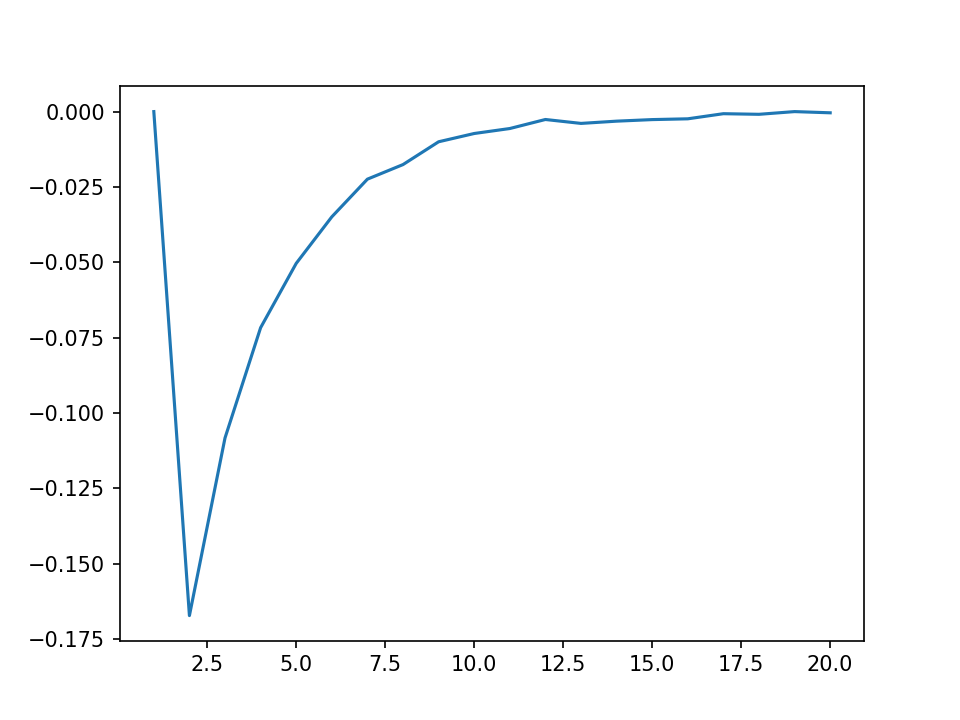

In [30]:
norm_acc = (acc - min(acc)) / (max(acc) - min(acc))
norm_loss = -(loss - min(loss)) / (max(loss) - min(loss))
print norm_acc, norm_loss

norm_alp = np.multiply(norm_acc, norm_loss)
alp = np.multiply(acc, loss)
val_alp = np.multiply(val_acc, val_loss)

fig, ax = plt.subplots(1)
ax.plot(epochs, norm_alp)
# ax.plot(epochs, val_alp)